# Classification
## in this notebook we will go throw variant types and scenarios for classifications
### - Like Logistic regression and when it is not suitable for me
### - SVM and KNN models 
### - And finally Gridsearch method to select one model or best hyper parameter in a model 

### Import numpy, matplotlib.pyplot, and sklearn 

In [1]:
#import numpy and name it np as always
import numpy as np

#import only needed method and classes from sklearn

#datasets import
from sklearn.datasets import make_moons 
#models to be used import 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#Data preprocessing import 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import polynomial_kernel
#Scores and accurcy values
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay,classification_report
#Pipelines and helper functions
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


#import matplotlib for visualization
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

In [2]:
#import the data with its labels
x_data, y_data = make_moons(n_samples = 300, noise=False)

## Data Visualization

<IPython.core.display.Javascript object>


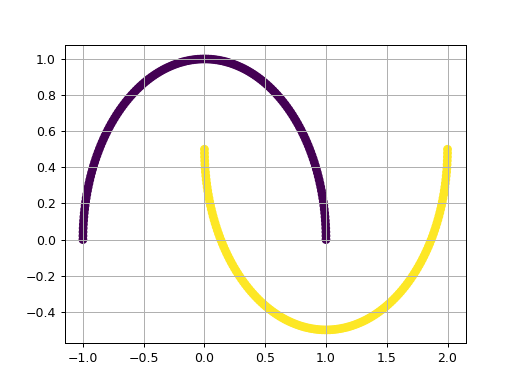

In [3]:
#Visualize your data in 2-D
plt.scatter(x_data[:,0],x_data[:,1],c = y_data)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


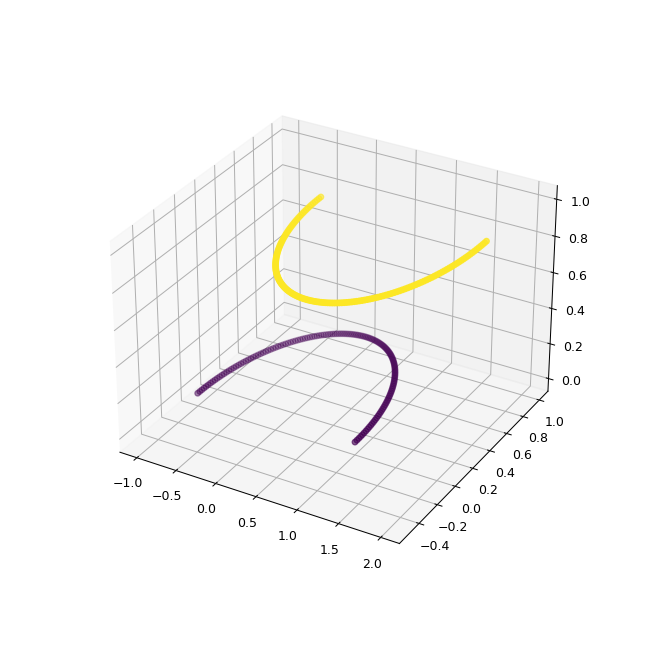

In [4]:
#3-D Visualization
#create figuare a 3-D one
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
#Plot the data scatterd
ax.scatter(x_data[:,0],x_data[:,1],y_data, c = y_data)

plt.show()

<IPython.core.display.Javascript object>


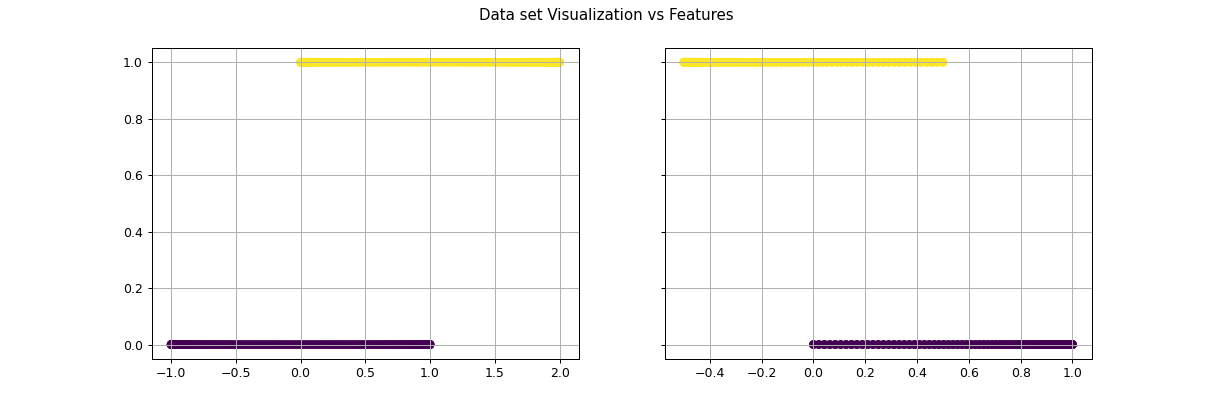

In [5]:
#plot how each feature related to the label
#create subplot
fig, ax = plt.subplots(1,2,sharey= True,figsize=(15,5))
ax[0].scatter(x_data[:,0],y_data,c = y_data)
ax[1].scatter(x_data[:,1],y_data,c = y_data)
fig.suptitle('Data set Visualization vs Features')
ax[0].grid()
ax[1].grid()

### Data pre-Processing and standrization

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, shuffle= True)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

In [27]:
reg = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(f'Accuracy score = {reg.score(X_test,y_test)}')

Accuracy score = 0.8666666666666667


In [8]:
cm =  confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print('** 0 label indecats Postive Sample.\n   1 label indecats Negative Sample.')

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.88      0.88      0.88        24

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45

** 0 label indecats Postive Sample.
   1 label indecats Negative Sample.


<IPython.core.display.Javascript object>


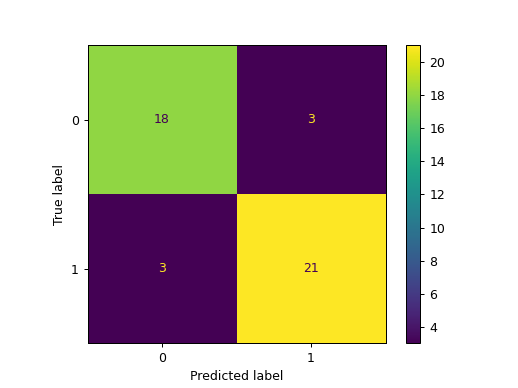

In [9]:
cmd_obj = ConfusionMatrixDisplay(cm)
cmd_obj.plot()

<IPython.core.display.Javascript object>


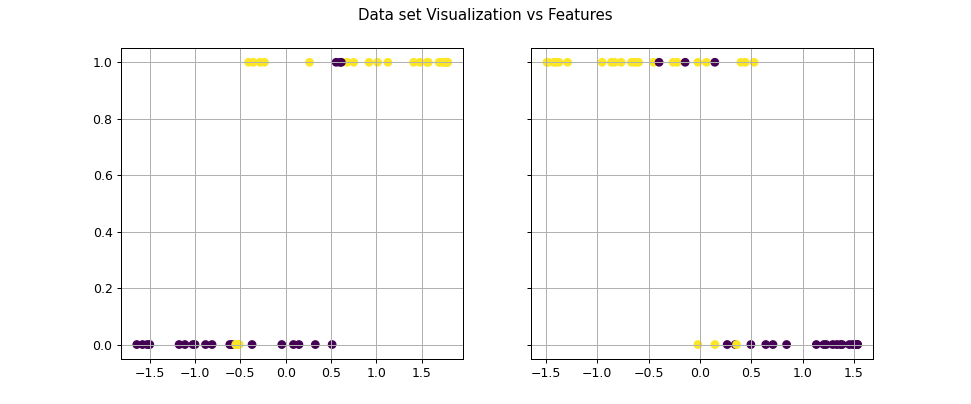

In [10]:
fig, ax = plt.subplots(1,2,sharey= True,figsize=(12,5))
ax[0].scatter(X_test[:,0],y_pred,c = y_test)
ax[1].scatter(X_test[:,1],y_pred,c = y_test)
fig.suptitle('Data set Visualization vs Features')
ax[0].grid()
ax[1].grid()


### Using Logistic Regression fro classification is not effective
####          -  Recall is around 85% and F1-score also around 85%
#### Those ratios are not acceptable

## Let's use polynomial_kernel function from sklearn
The function polynomial_kernel computes the degree-d polynomial kernel between two vectors. The polynomial kernel represents the similarity between two vectors. Conceptually, the polynomial kernels considers not only the similarity between vectors under the same dimension, but also across dimensions. When used in machine learning algorithms, this allows to account for feature interaction.

The polynomial kernel is defined as:

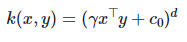

In [28]:
gram_train = polynomial_kernel(X_train)

gram_test = polynomial_kernel(X_test,X_train)


In [29]:
reg = LogisticRegression(class_weight='balanced',max_iter=1000).fit(gram_train, y_train)

print(f'Train score = {reg.score(gram_train,y_train)}')

y_pred = reg.predict(gram_test)

print(f'Accuracy score = {reg.score(gram_test,y_test)}')

Train score = 1.0
Accuracy score = 1.0


# Support Vector  Classifire from SVM

In [30]:
svm = SVC(C=1.0,kernel='precomputed')

svm.fit(gram_train, y_train)
print("training score = ", svm.score(gram_train,y_train))

predictions_test = svm.predict(gram_test)
print('testing accuracy = ', accuracy_score(predictions_test, y_test))

training score =  1.0
testing accuracy =  1.0


<IPython.core.display.Javascript object>


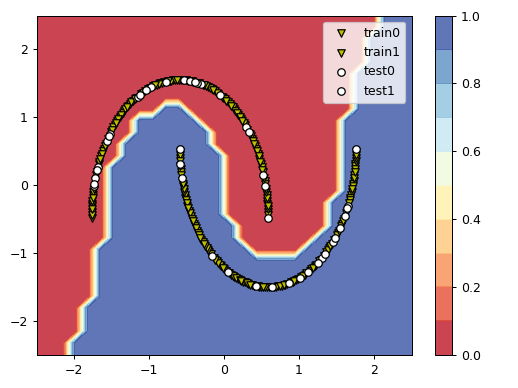

In [31]:
xx, yy = np.meshgrid(np.linspace(-2.5,2.5, 30), np.linspace(-2.5, 2.5, 30))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]
tt=polynomial_kernel(X_grid, X_train)
# start plot
plt.figure()

#LinearSegmentedColormap
cm = plt.cm.RdYlBu

# plot decision regions
predictions_grid = [svm.predict(tt)]
Z = np.reshape(predictions_grid, xx.shape)
cnt = plt.contourf(xx, yy, Z, levels=np.arange(0, 1.1, 0.1), cmap=cm, alpha=.8)
plt.colorbar(cnt, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])

plt.scatter(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], c='y', marker='v', edgecolors='k',label='train0')
plt.scatter(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], c='y', marker='v', edgecolors='k',label='train1')

plt.scatter(X_test[:, 0][y_test==0], X_test[:, 1][y_test==0], c='white', marker='o', edgecolors='k',label='test0')
plt.scatter(X_test[:, 0][y_test==1], X_test[:, 1][y_test==1], c='white', marker='o', edgecolors='k',label='test1')

plt.legend()
plt.tight_layout()
plt.show()

In [33]:
cm =  confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print('** 0 label indecats Postive Sample.\n   1 label indecats Negative Sample.')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        20

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

** 0 label indecats Postive Sample.
   1 label indecats Negative Sample.


<IPython.core.display.Javascript object>


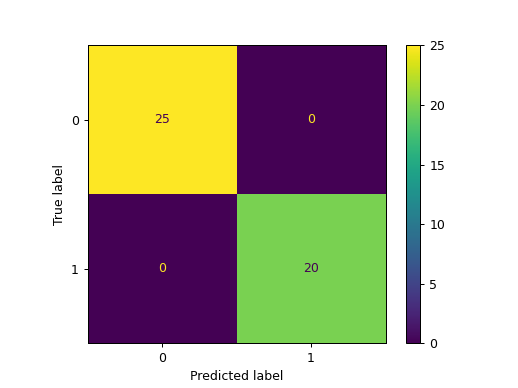

In [34]:
cmd_obj = ConfusionMatrixDisplay(cm)
cmd_obj.plot()

# Use the Gridsearch method in scikit-learn to compare between two models: KNN, SVM

In [37]:
pipe = Pipeline([('classifier', KNeighborsClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [SVC()],
                  'classifier__C': [0.1, 1, 10, 100, 1000],
                  'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'classifier__kernel': ['rbf']},
                {'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors' : range(1, 21, 2),
                 'classifier__weights':['uniform', 'distance']}]

 
grid = GridSearchCV(pipe, search_space , refit = True, return_train_score = True)

best_model = grid.fit(X_train,y_train)
print(f'Best model to be used, with its key features : {best_model.best_estimator_}\n')

#all of this model prarmeters :
# print(f'The features of the model to be used : {best_model.best_estimator_.get_params()}\n')

best_model.predict(X_test)
print('Testing accuracy = ', accuracy_score(best_model.predict(X_test), y_test))

Best model to be used, with its key features : Pipeline(steps=[('classifier', SVC(C=0.1, gamma=1))])

Testing accuracy =  1.0


In [38]:
cm =  confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print('** 0 label indecats Postive Sample.\n   1 label indecats Negative Sample.')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        20

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

** 0 label indecats Postive Sample.
   1 label indecats Negative Sample.


<IPython.core.display.Javascript object>


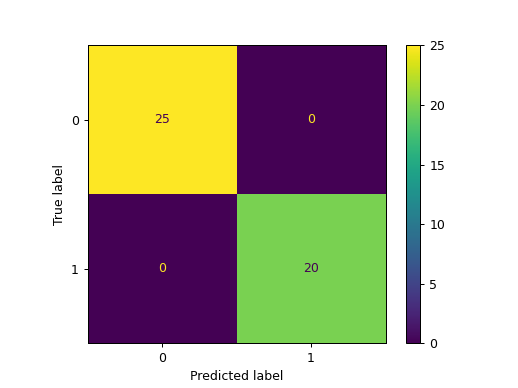

In [39]:
cmd_obj = ConfusionMatrixDisplay(cm)
cmd_obj.plot()